# EDA del Primer Proyecto Individual de DATAPT11 de la Academia SoyHenry

### Nombre del proyecto: Sistema de Recomendación de Películas
### Autor: Francisco Hugo Lezik

#

### Librerías:

In [2]:
import os
from collections import Counter
import random

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud

Importacion del dataset simple data. Contiene los datos simples de las películas.

In [7]:
current_dir = (
    os.getcwd()
    )

current_dir

'c:\\Users\\franc\\Desktop\\Proyecto Individual DataPT10\\Proyecto_Peliculas\\notebooks'

In [6]:
base_dir = (
    os.path.dirname(
        current_dir
        )
    )

base_dir

'c:\\Users\\franc\\Desktop\\Proyecto Individual DataPT10\\Proyecto_Peliculas'

In [8]:
file_path = (
    os.path.join(
        base_dir, 
        'data', 
        'ETL_data', 
        'movies_dataset', 
        'simple_data.parquet'
        )
    )

file_path

'c:\\Users\\franc\\Desktop\\Proyecto Individual DataPT10\\Proyecto_Peliculas\\data\\ETL_data\\movies_dataset\\simple_data.parquet'

In [9]:
movies = (
    pd.read_parquet(
        file_path, 
        engine='fastparquet'
        )
    )

movies.iloc[0]

budget                                                        30000000
movie_id                                                           862
original_language                                                   en
overview             Led by Woody, Andy's toys live happily in his ...
popularity                                                   21.946943
release_date                                       1995-10-30 00:00:00
revenue                                                      373554033
runtime                                                           81.0
status                                                        Released
tagline                                                           None
title                                                        Toy Story
vote_average                                                       7.7
vote_count                                                        5415
release_year                                                      1995
return

In [157]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             45376 non-null  int64         
 1   movie_id           45376 non-null  object        
 2   original_language  45365 non-null  object        
 3   overview           44435 non-null  object        
 4   popularity         45376 non-null  float64       
 5   release_date       45376 non-null  datetime64[ns]
 6   revenue            45376 non-null  int64         
 7   runtime            45130 non-null  float64       
 8   status             45296 non-null  object        
 9   tagline            20398 non-null  object        
 10  title              45376 non-null  object        
 11  vote_average       45376 non-null  float64       
 12  vote_count         45376 non-null  int64         
 13  release_year       45376 non-null  object        
 14  return

In [158]:
movies['status'].value_counts()

Released           44936
Rumored              230
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: status, dtype: int64

In [159]:
peliculas_estrenadas = movies[
    movies['status'] == 'Released'
    ]

peliculas_estrenadas['status'].value_counts()

Released    44936
Name: status, dtype: int64

In [160]:
del movies

In [161]:
peliculas_estrenadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44936 entries, 0 to 45375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             44936 non-null  int64         
 1   movie_id           44936 non-null  object        
 2   original_language  44926 non-null  object        
 3   overview           44029 non-null  object        
 4   popularity         44936 non-null  float64       
 5   release_date       44936 non-null  datetime64[ns]
 6   revenue            44936 non-null  int64         
 7   runtime            44696 non-null  float64       
 8   status             44936 non-null  object        
 9   tagline            20287 non-null  object        
 10  title              44936 non-null  object        
 11  vote_average       44936 non-null  float64       
 12  vote_count         44936 non-null  int64         
 13  release_year       44936 non-null  object        
 14  return

In [162]:
current_dir = os.getcwd()

current_dir

'c:\\Users\\franc\\Desktop\\Proyecto_Peliculas\\notebooks'

In [163]:
base_dir = (
    os.path.dirname(
        current_dir
        )
    )

base_dir

'c:\\Users\\franc\\Desktop\\Proyecto_Peliculas'

In [164]:
file_path = (
    os.path.join(
        base_dir, 
        'data', 
        'ETL_data', 
        'movies_dataset', 
        'previous_nested_data', 
        'genres.parquet'
        )
    )

file_path

'c:\\Users\\franc\\Desktop\\Proyecto_Peliculas\\data\\ETL_data\\movies_dataset\\previous_nested_data\\genres.parquet'

In [165]:
genres = (
    pd.read_parquet(
        file_path, 
        engine='fastparquet'
        )
    )

genres.head()

,genre_id,genre_name,movie_id
0,16,Animation,862
1,35,Comedy,862
2,10751,Family,862
3,12,Adventure,8844
4,14,Fantasy,8844


In [166]:
peliculas_estrenadas = (
    peliculas_estrenadas.merge(
        genres, 
        on='movie_id', 
        how='inner'
        )
    )

peliculas_estrenadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90443 entries, 0 to 90442
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   budget             90443 non-null  int64         
 1   movie_id           90443 non-null  object        
 2   original_language  90431 non-null  object        
 3   overview           89408 non-null  object        
 4   popularity         90443 non-null  float64       
 5   release_date       90443 non-null  datetime64[ns]
 6   revenue            90443 non-null  int64         
 7   runtime            90194 non-null  float64       
 8   status             90443 non-null  object        
 9   tagline            46376 non-null  object        
 10  title              90443 non-null  object        
 11  vote_average       90443 non-null  float64       
 12  vote_count         90443 non-null  int64         
 13  release_year       90443 non-null  object        
 14  return

In [167]:
columnas_de_numeros = (
    peliculas_estrenadas[
        [
            'popularity', 
            'runtime', 
            'vote_average', 
            'vote_count'
            ]
        ]
    )

columnas_de_numeros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90443 entries, 0 to 90442
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    90443 non-null  float64
 1   runtime       90194 non-null  float64
 2   vote_average  90443 non-null  float64
 3   vote_count    90443 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 3.5 MB


In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

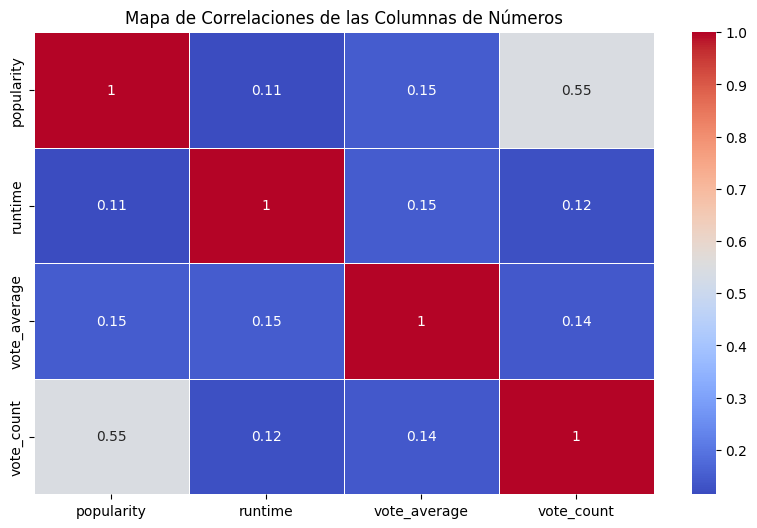

In [169]:
plt.figure(
    figsize=(10,6)
    )
sns.heatmap(
    columnas_de_numeros.corr(), 
    annot=True, 
    cmap='coolwarm', 
    linewidths=0.5
    )
plt.title(
    'Mapa de Correlaciones de las Columnas de Números'
    )
plt.show()

In [170]:
columnas_de_textos = (
    peliculas_estrenadas[
        [
            'overview', 
            'tagline', 
            'genre_name'
            ]
        ]
    )

columnas_de_textos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90443 entries, 0 to 90442
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overview    89408 non-null  object
 1   tagline     46376 non-null  object
 2   genre_name  90443 non-null  object
dtypes: object(3)
memory usage: 2.8+ MB


In [171]:
del peliculas_estrenadas

In [172]:
columnas_de_textos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90443 entries, 0 to 90442
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overview    89408 non-null  object
 1   tagline     46376 non-null  object
 2   genre_name  90443 non-null  object
dtypes: object(3)
memory usage: 2.8+ MB


In [173]:
columnas_de_textos.fillna(
    '', inplace=True)

In [174]:
columnas_de_textos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90443 entries, 0 to 90442
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overview    90443 non-null  object
 1   tagline     90443 non-null  object
 2   genre_name  90443 non-null  object
dtypes: object(3)
memory usage: 2.8+ MB


In [175]:
columnas_de_textos['text'] = (
    columnas_de_textos['overview'] 
    + ' ' 
    + columnas_de_textos['tagline']
    )

In [176]:
columnas_de_textos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90443 entries, 0 to 90442
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overview    90443 non-null  object
 1   tagline     90443 non-null  object
 2   genre_name  90443 non-null  object
 3   text        90443 non-null  object
dtypes: object(4)
memory usage: 3.5+ MB


Agrupar por genero

In [177]:
textos_por_genero = (
    columnas_de_textos
    .groupby('genre_name')['text']
    .agg(lambda x: ' '.join(x))
    .reset_index()
    )

textos_por_genero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   genre_name  20 non-null     object
 1   text        20 non-null     object
dtypes: object(2)
memory usage: 452.0+ bytes


In [178]:
textos_por_genero.set_index(
    'genre_name', 
    inplace=True
    )

textos_por_genero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Action to Western
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20 non-null     object
dtypes: object(1)
memory usage: 320.0+ bytes


In [179]:
palabras_por_genero = pd.DataFrame(
    index=textos_por_genero.index, 
    columns=['palabras'])

palabras_por_genero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Action to Western
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   palabras  0 non-null      object
dtypes: object(1)
memory usage: 320.0+ bytes


In [180]:
palabras_por_genero.index

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'],
      dtype='object', name='genre_name')

In [181]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from collections import Counter

In [182]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [183]:
for row in textos_por_genero.itertuples():
    texto = row.text
    palabras = word_tokenize(
        texto.lower()
        )
    
    etiquetas = pos_tag(palabras)
    filtro = [
        palabra for palabra, etiqueta 
        in etiquetas if etiqueta 
        in ['NN', 'NNS', 'NNP', 'NNPS', 
            'JJ', 'JJR', 'JJS'] 
        and palabra not in ['movie', 'film', 
                            'story', '’', 
                            's']
        ]
    
    genero = row.Index
    cantidad_por_palabra = Counter(filtro)
    palabras_por_genero.at[
        genero, 
        'palabras'
        ] = cantidad_por_palabra

In [184]:
del textos_por_genero

In [185]:
palabras_por_genero.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Action to Western
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   palabras  20 non-null     object
dtypes: object(1)
memory usage: 876.0+ bytes


In [186]:
palabras_por_genero.at['Animation', 'palabras'].most_common(10)

[('world', 387),
 ('new', 327),
 ('life', 262),
 ('young', 221),
 ('time', 207),
 ('friends', 186),
 ('adventure', 168),
 ('family', 160),
 ('man', 159),
 ('way', 157)]

In [187]:
palabras_por_genero.at['Documentary', 'palabras'].most_common(10)

[('documentary', 1338),
 ('world', 917),
 ('life', 856),
 ('new', 544),
 ('years', 534),
 ('people', 417),
 ('american', 384),
 ('first', 362),
 ('man', 357),
 ('footage', 341)]

In [188]:
import random

In [189]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"hsl({random.randint(0, 360)}, 100%, {random.randint(10, 30)}%)"

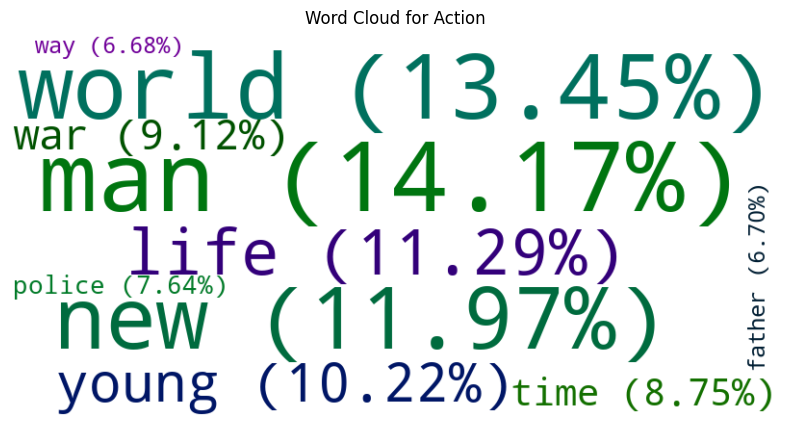

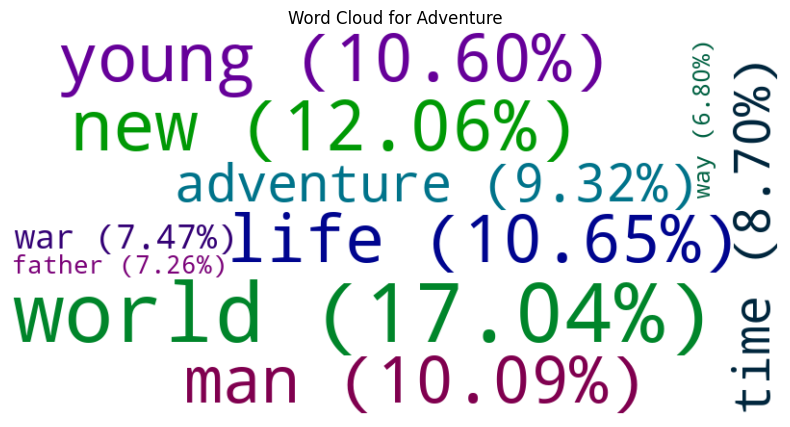

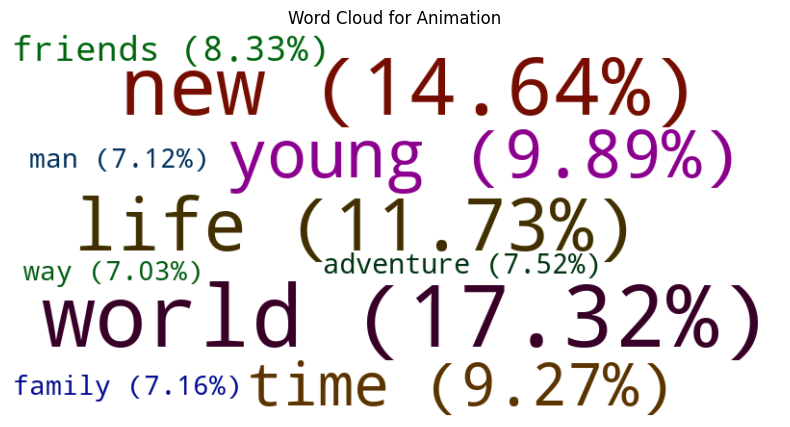

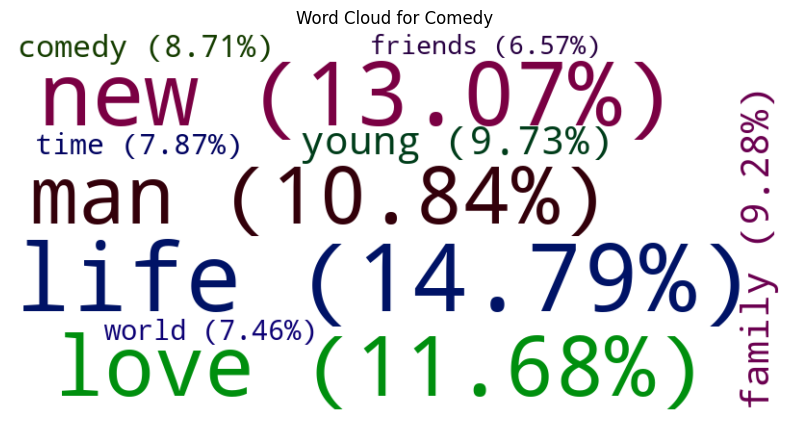

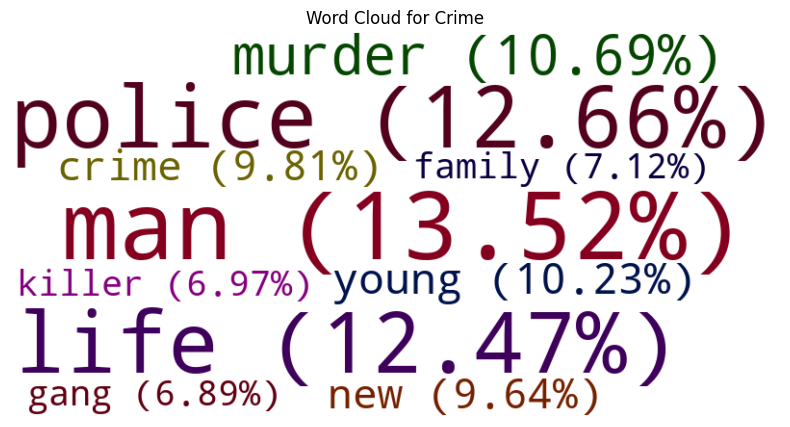

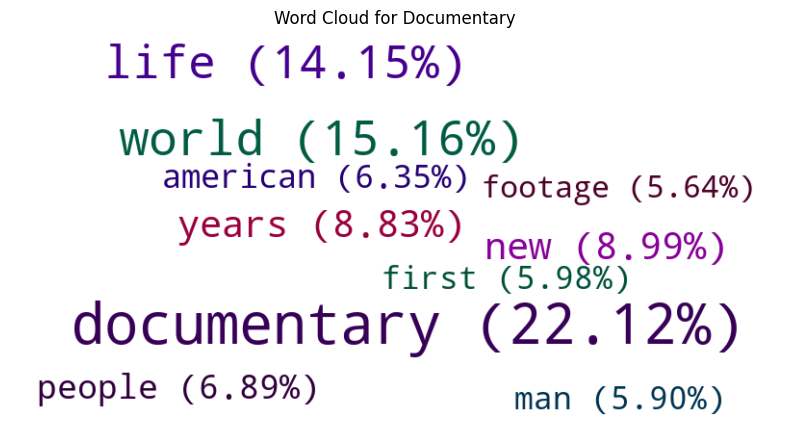

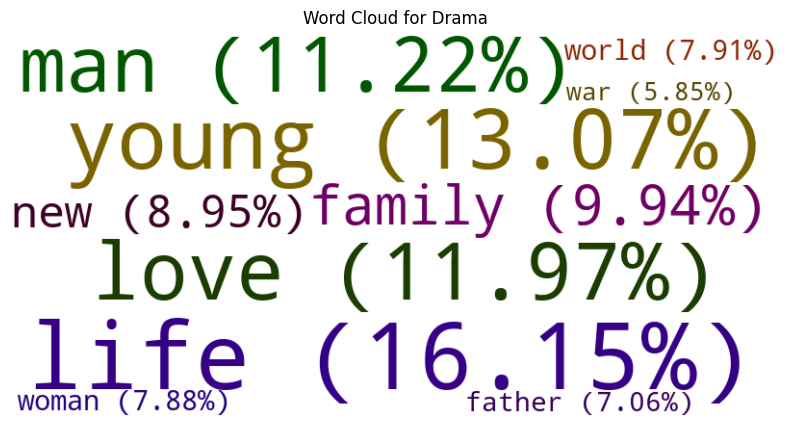

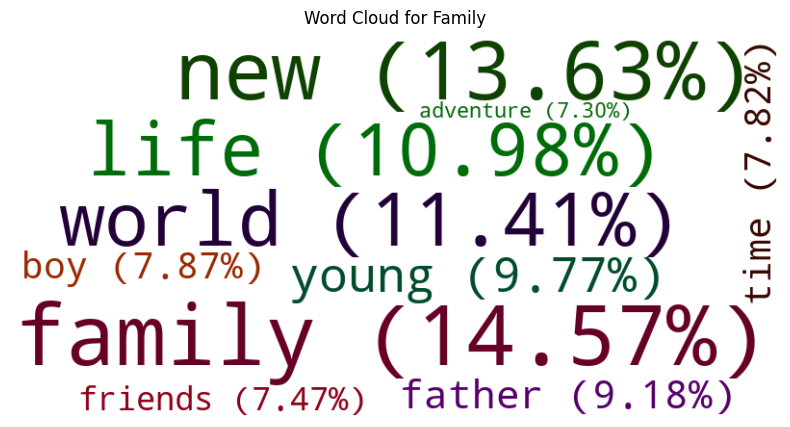

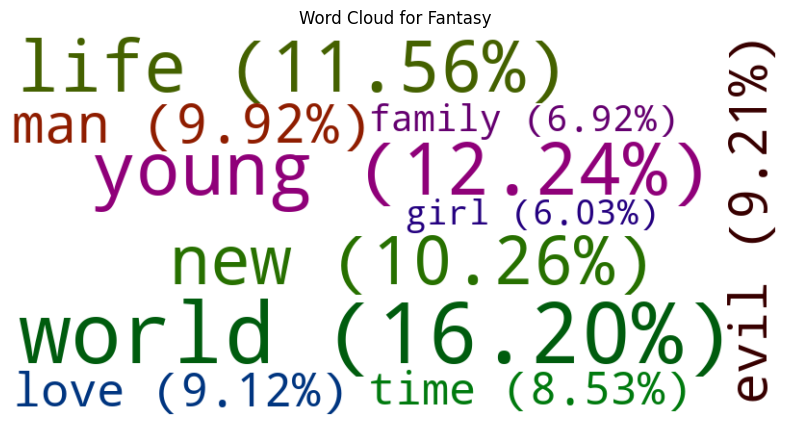

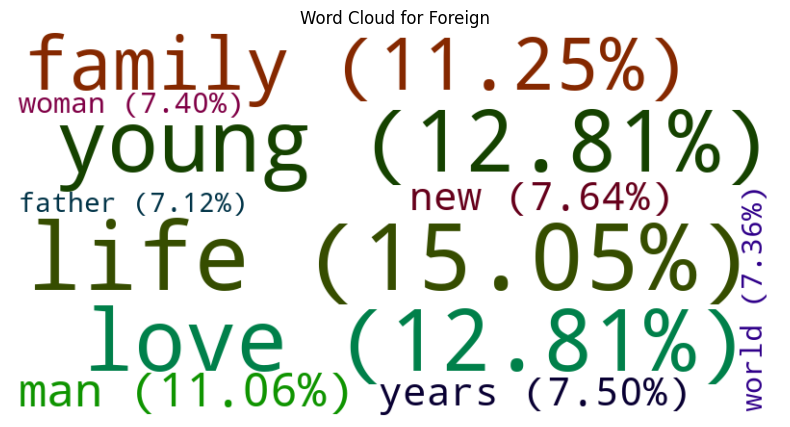

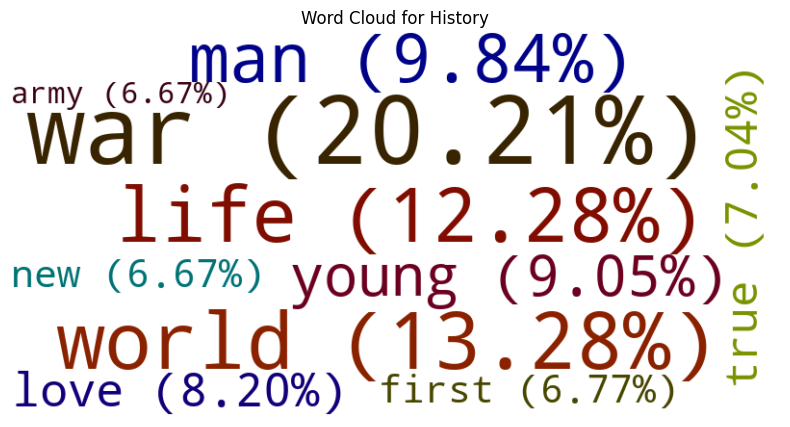

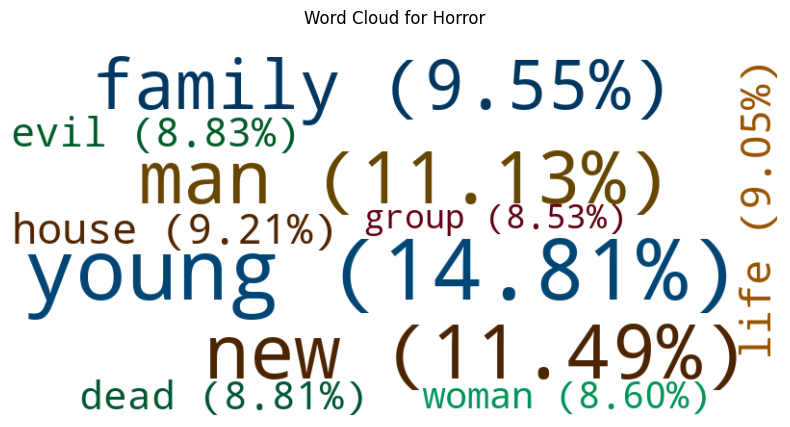

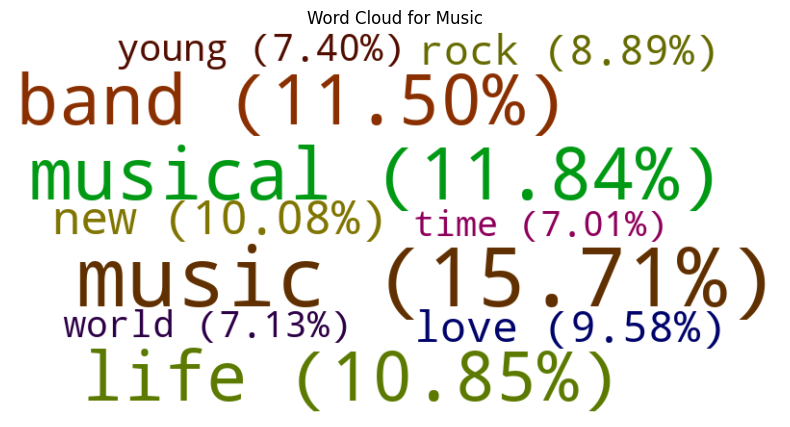

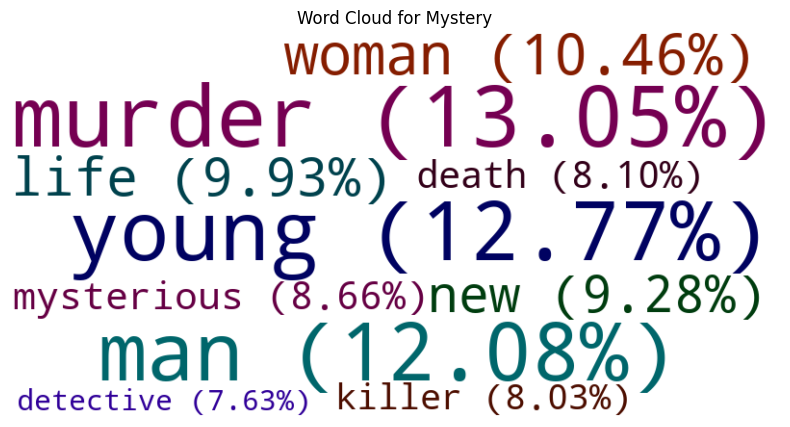

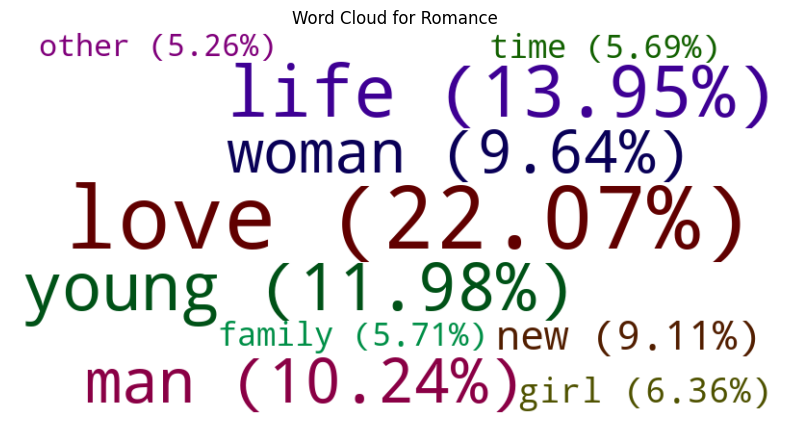

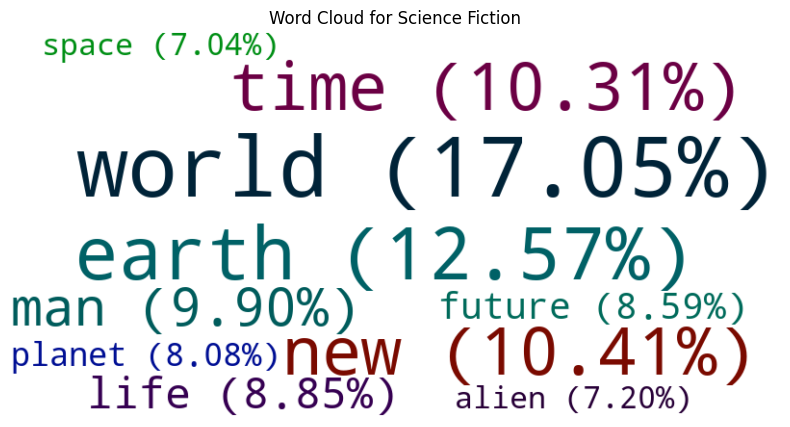

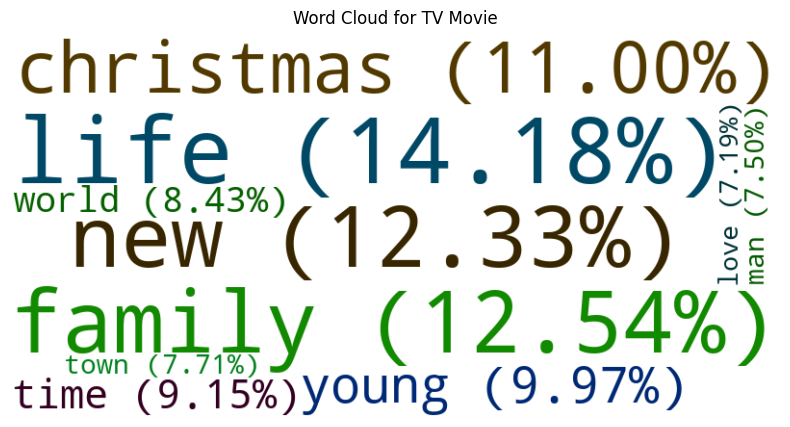

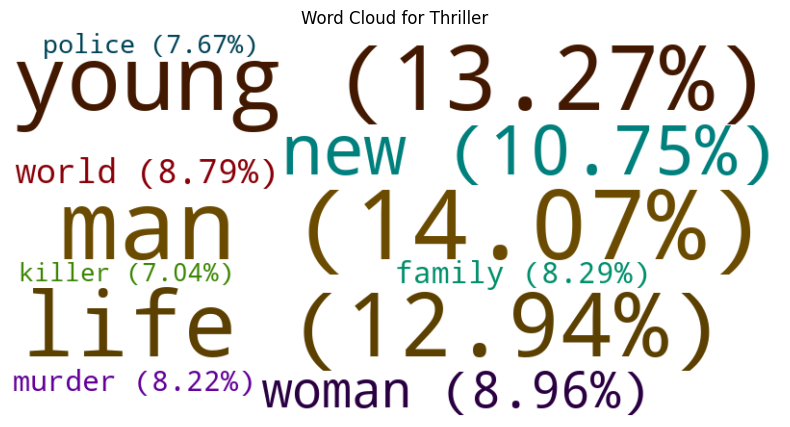

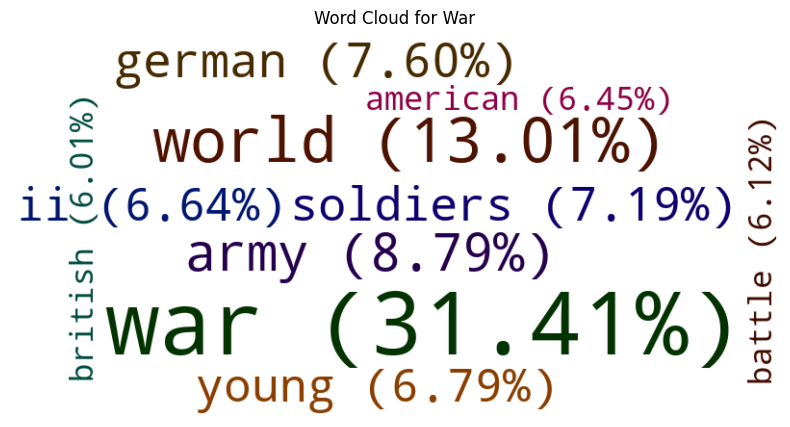

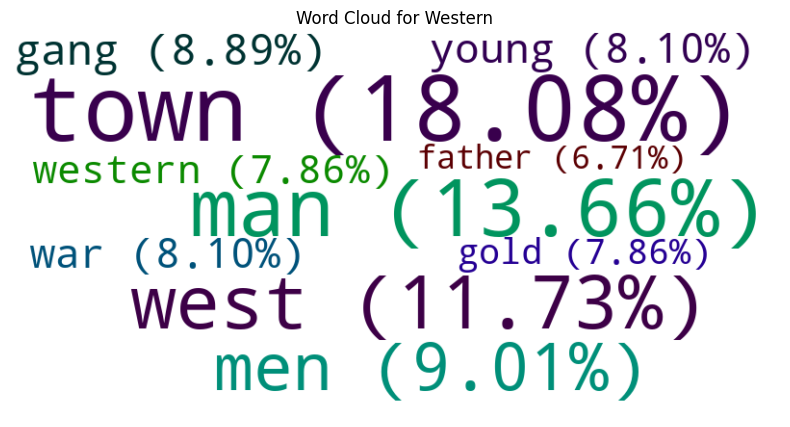

In [191]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for genero in palabras_por_genero.index:
    frecuencias = {
        palabra: frecuencia for palabra, 
        frecuencia in palabras_por_genero.at[
            genero, 'palabras'
            ].most_common(10)
        }
    suma_total = sum(
        frecuencias.values()
        )
    frecuencias_porcentaje = {
        palabra: (frecuencia / suma_total) * 100 
        for palabra, frecuencia 
        in frecuencias.items()
        }

    texto_nube = {
        f"{palabra} ({frecuencia:.2f}%)": frecuencia 
        for palabra, frecuencia 
        in frecuencias_porcentaje.items()
        }

    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        color_func=color_func, 
        relative_scaling=0.5
        ).generate_from_frequencies(texto_nube)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genero}')
    plt.axis('off')
    plt.show()